## Decision Tree

### Fitting

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    max_depth=3,              # Limiting depth of the tree
    min_samples_split=4,      # Minimum number of samples required to split an internal node
    min_samples_leaf=2,       # Minimum number of samples required to be at a leaf node
    max_leaf_nodes=10,        # Maximum number of leaf nodes
    min_impurity_decrease=0.01  # Minimum impurity decrease required for a split to be performed
)
# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')


Accuracy of Decision Tree: 1.00


### Plotting

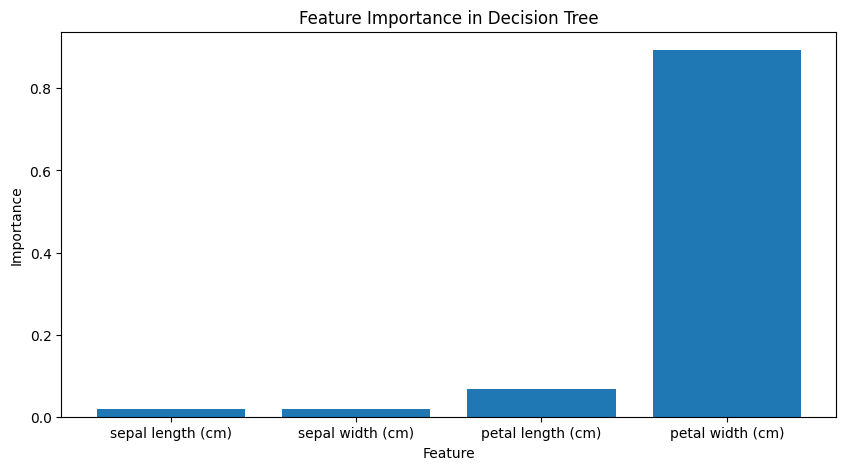

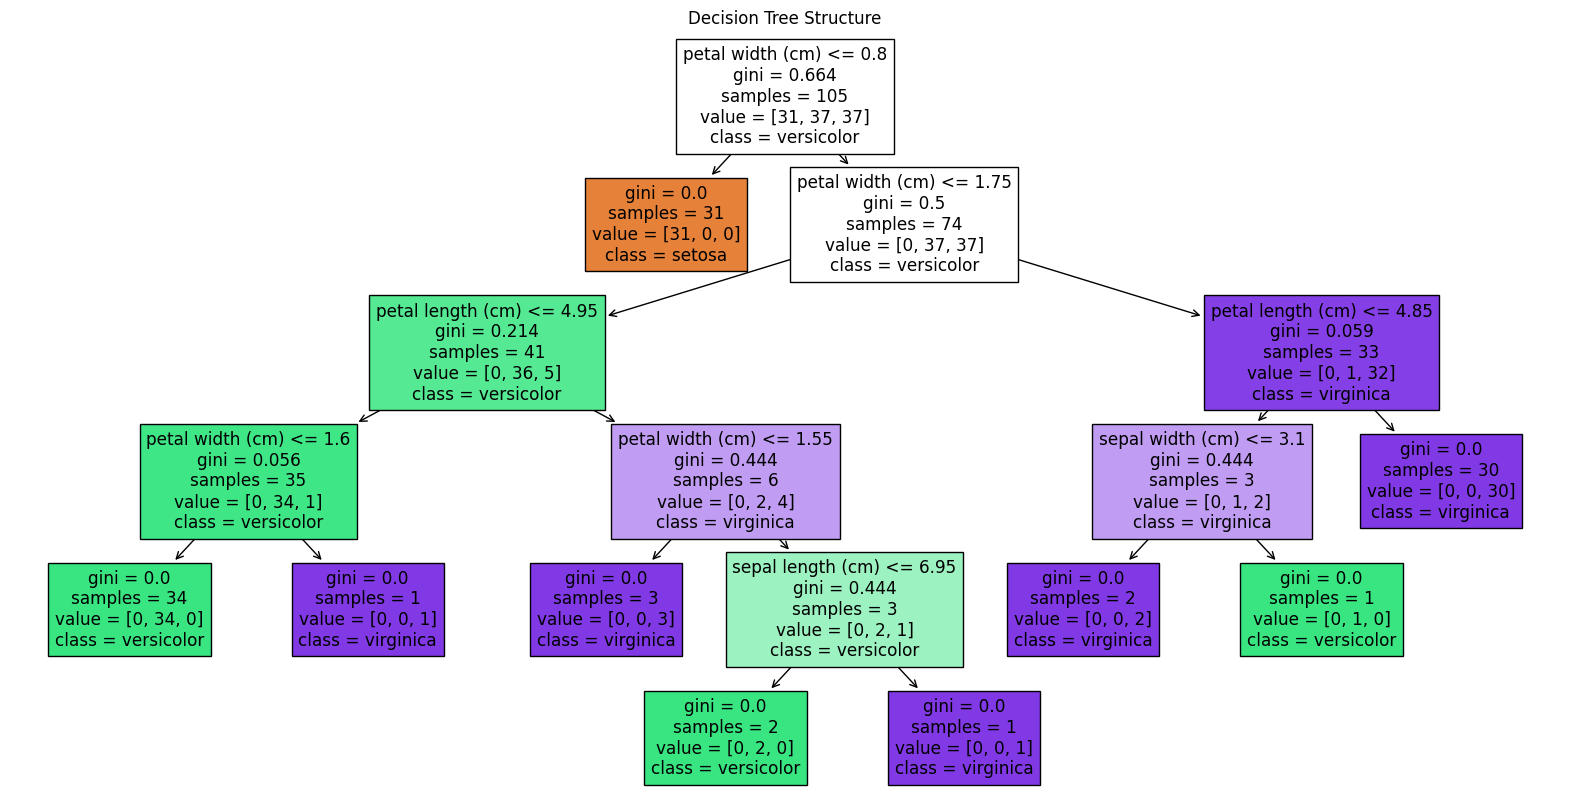

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train the model (using previous setup)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Feature importance
importances = dt_classifier.feature_importances_
features = data.feature_names
plt.figure(figsize=(10, 5))
plt.bar(features, importances)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=features, class_names=data.target_names, filled=True)
plt.title('Decision Tree Structure')
plt.show()

### Post-pruning

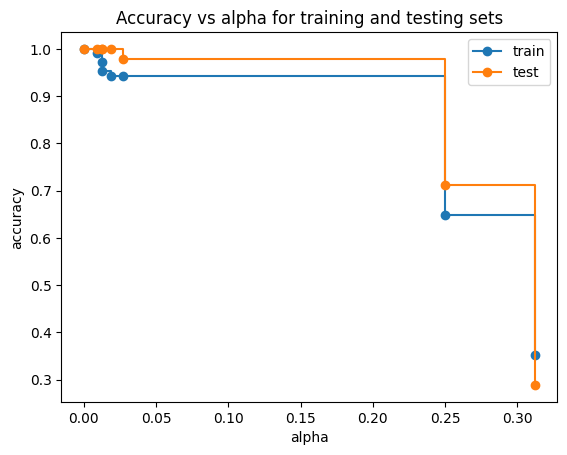

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an unpruned decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Get cost-complexity pruning path
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a decision tree for each alpha and evaluate it
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot alpha vs accuracy
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Random Forests

In [11]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=3,        # Maximum depth of each tree
    random_state=42     # Ensures a consistent sequence of pseudo-random numbers
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.2f}')


Accuracy of Random Forest: 1.00


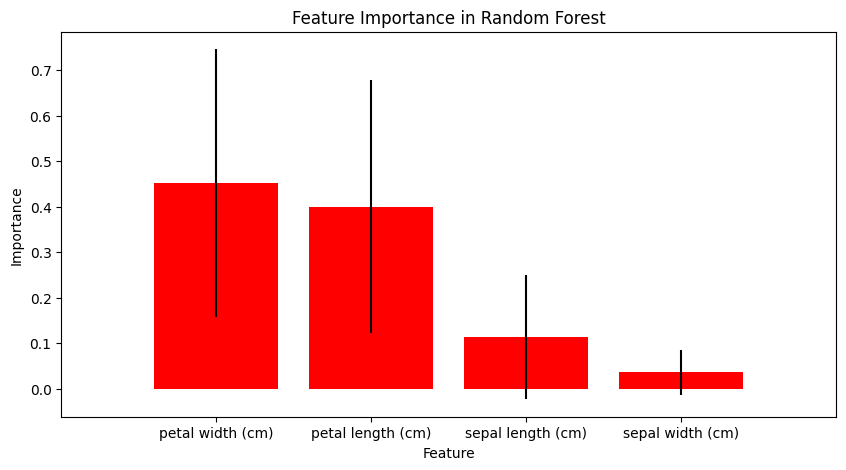

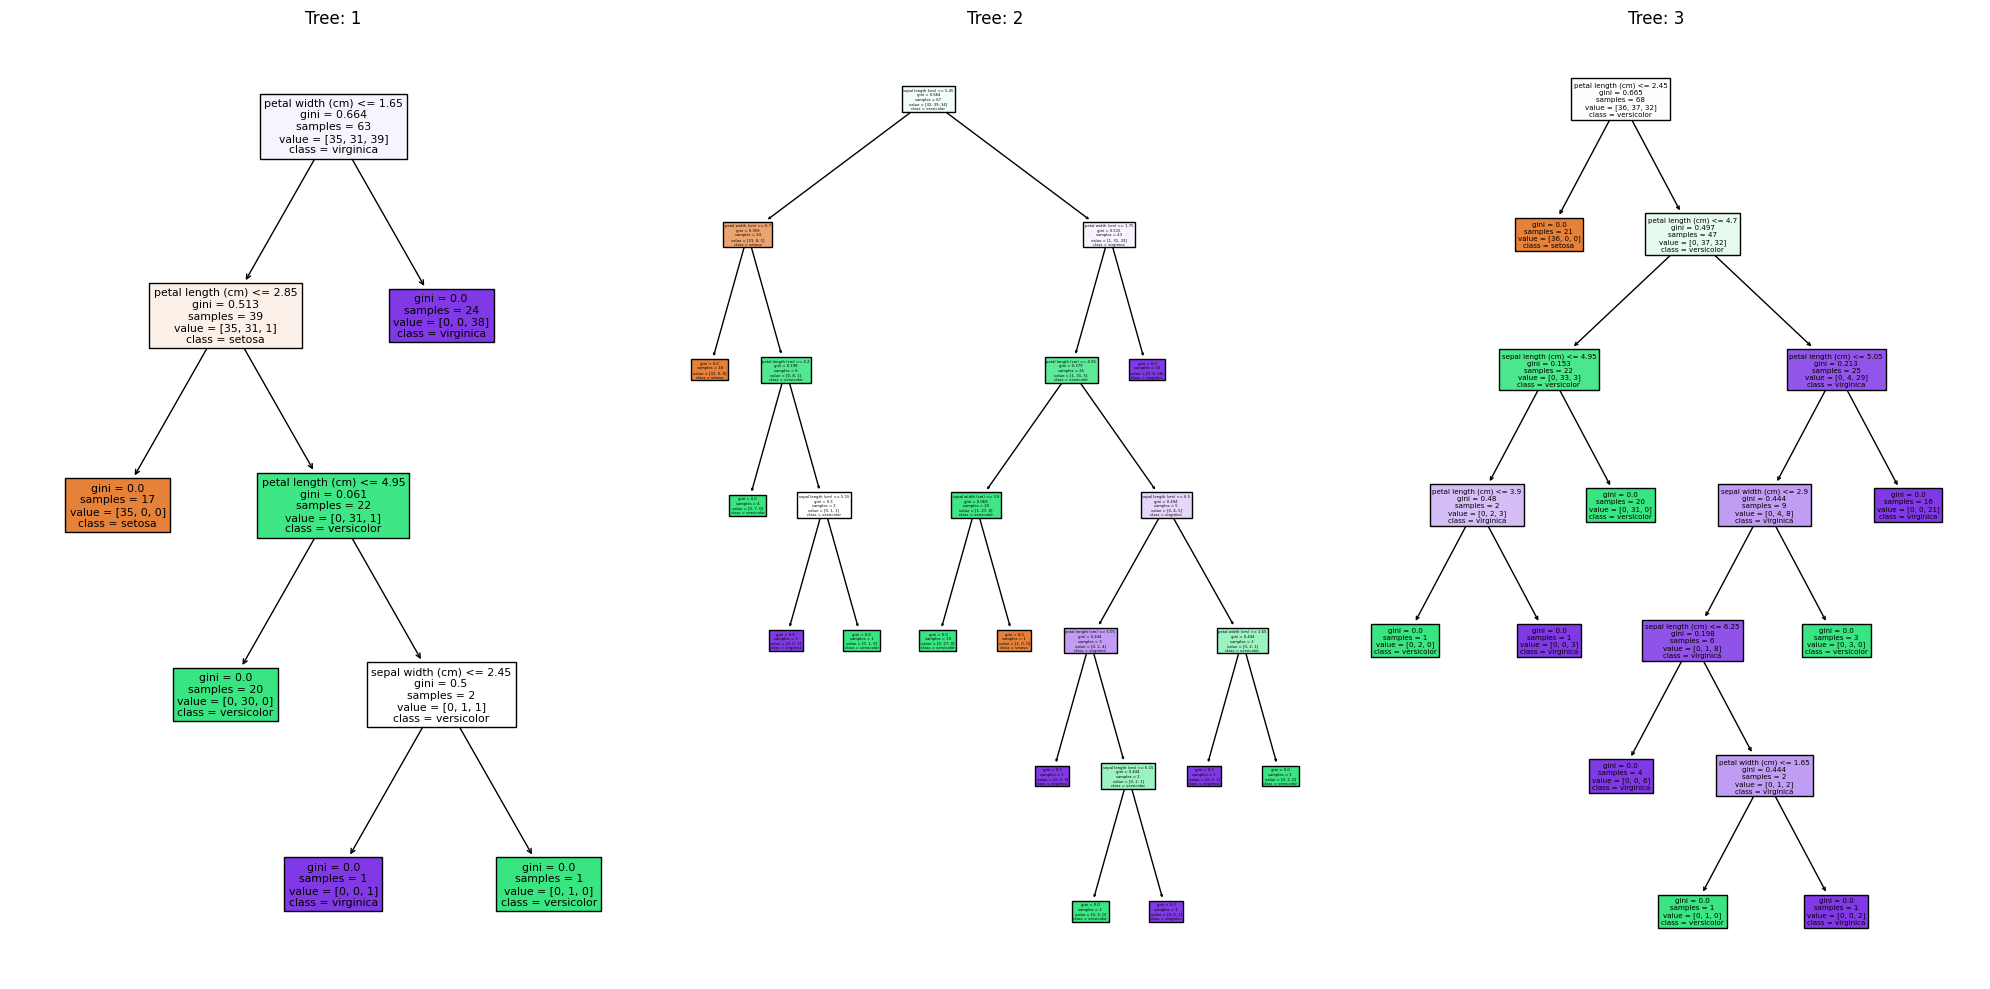

In [10]:
import numpy as np

# Train the model (using previous setup)
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Feature importance
importances_rf = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
indices = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances_rf[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.title('Feature Importance in Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Visualize the first few trees in the forest
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
for index in range(0, 3):
    plot_tree(rf_classifier.estimators_[index], feature_names=features, class_names=data.target_names, filled=True, ax=axes[index])
    axes[index].set_title(f'Tree: {index + 1}')
plt.tight_layout()
plt.show()
